In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import yt
from yt import YTArray
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from mpl_toolkits.axes_grid1 import make_axes_locatable

/home/bego/anaconda3/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/bego/.config/yt/ytrc is deprecated in favor of /home/bego/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [3]:
df15 = pd.read_csv(path_results + f"10-15kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
df10 = pd.read_csv(path_results + f"5-10kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)

In [22]:
def plot_by_region(variable, etiqueta, units):
    global df10, df15       
    fig, ax = plt.subplots(figsize = (9,3))
    ax.plot(df15["Lookback"],df10[f"{variable}"],label = f"{etiqueta} 5-10 kpc", lw=1)
    ax.plot(df15["Lookback"],df15[f"{variable}"],label = f"{etiqueta} 10-15 kpc", lw=1)
    ax.grid()
    ax.set_xlim(6.3,0)
  #  ax.set_ylim(0,5.5)
    ax.set_ylabel(f'Amplitude [{units}]', fontsize = 12)
    ax.set_xlabel ("Lookback time [Gyr]")
    ax.legend()
    plt.show()
   # plt.savefig("results/bending_breathing_fourier_shells.png", dpi = 100, facecolor = "white",bbox_inches = "tight")


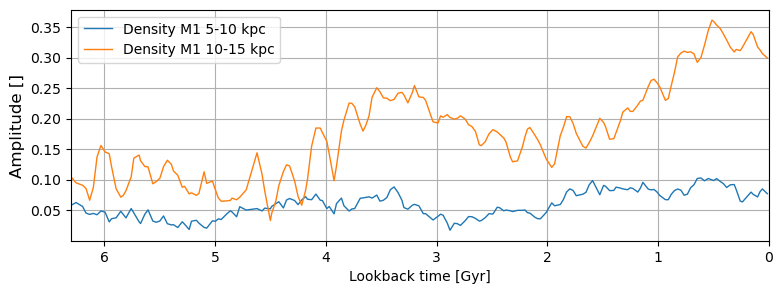

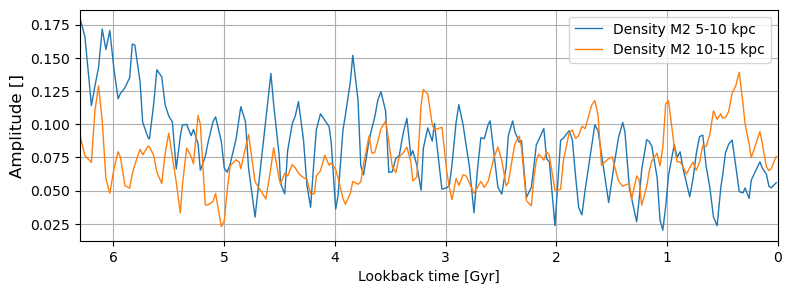

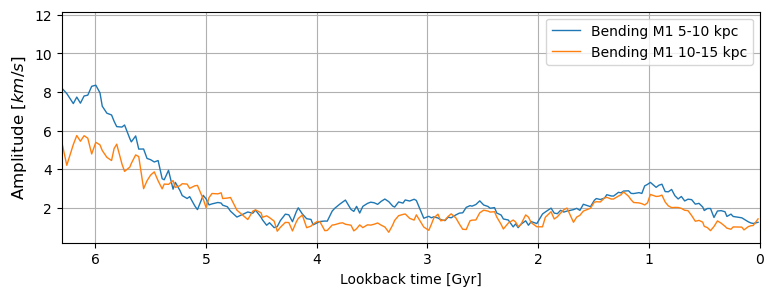

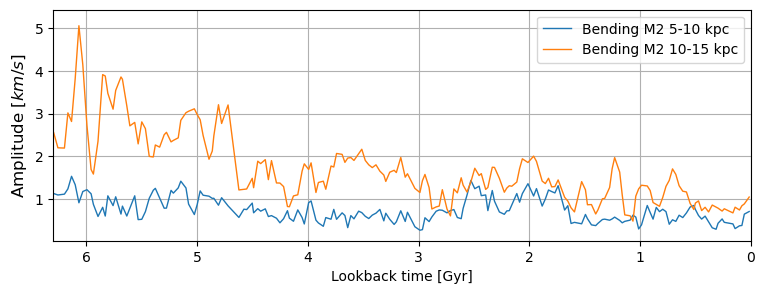

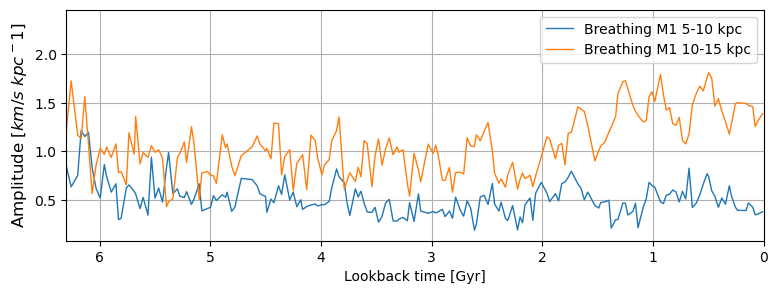

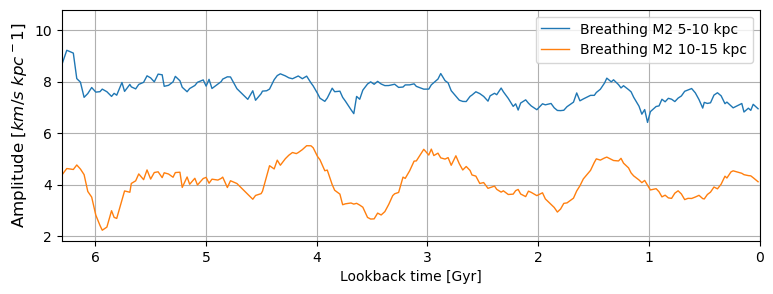

In [23]:
plot_by_region("density", "Density M1", units= "" )
plot_by_region("densityM2", "Density M2", units = "" )
plot_by_region("Bending", "Bending M1", units = "$km/s$" )
plot_by_region("BendingM2", "Bending M2", units = "$km/s$" )
plot_by_region("Breathing", "Breathing M1", units = "$km/s$ $kpc^-1$" )
plot_by_region("BreathingM2", "Breathing M2", units = "$km/s$ $kpc^-1$" )

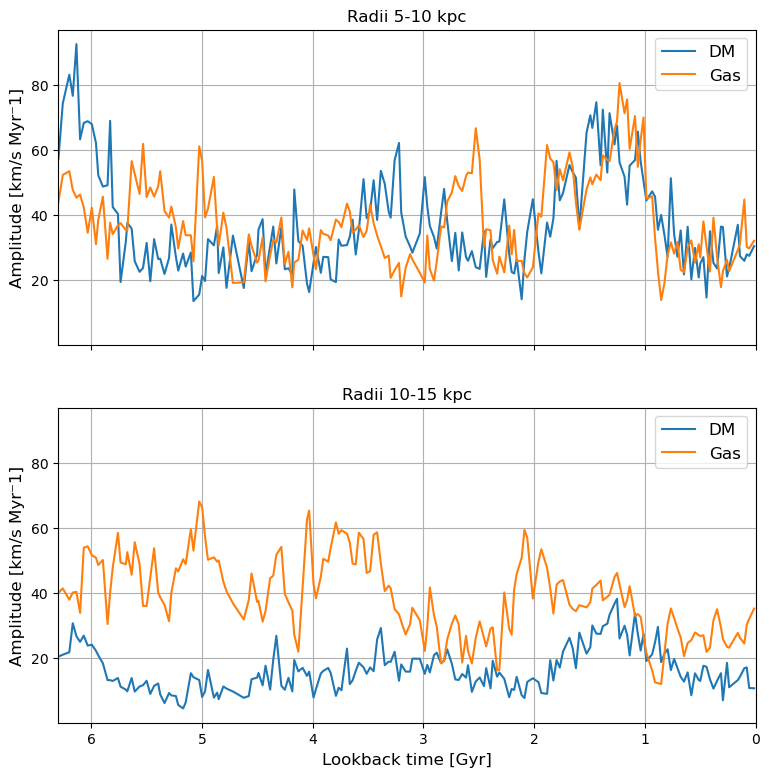

In [25]:
fig, ax = plt.subplots(nrows=2, figsize = (9,9), sharex = True, sharey = True)

ax[0].set_title("Radii 5-10 kpc")
ax[0].plot(df10["Lookback"], df10["DM"],label = "DM")
ax[0].plot(df10["Lookback"],df10["Gas"],label = "Gas")
ax[0].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)

ax[0].legend(fontsize = 12)


ax[1].set_title("Radii 10-15 kpc")

ax[1].plot(df15["Lookback"],df15["DM"],label = "DM")
ax[1].plot(df15["Lookback"],df15["Gas"],label = "Gas")

ax[1].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[1].set_xlabel("Lookback time [Gyr]", fontsize =12)
ax[1].grid()
ax[1].set_xlim(6.3,0)

ax[1].legend(fontsize = 12)


#plt.savefig("results/DM_vs_gas_acceleration.png", dpi = 100, facecolor = "white")

